In [ ]:
# Local Working Directory
import os
	
def current_path():
	print("Current working directory before")
	print(os.getcwd())
	print()
	
# Changing the Working Dir = CH MacBook Pro (Work)
#os.chdir('/Users/jonathan.cachat/Library/CloudStorage/OneDrive-CardinalHealth/JupyterNB-JC/00-WorkingDir/data')

# Printing CWD after
current_path()

## Indexing & resampling time series
- Time series transformation
    - Basic time series transformations include:
        - Parsing string dates and convert to ```datetime64```
        - Selecting & slicing for specific subperiods
        - Setting & changing ```DateTimeIndex``` frequency
            - Upsampling : Higher frequency implies new dates -> missing data
            

In [1]:
import pandas as pd
import numpy as np
import seaborn 
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (25, 25)

In [ ]:
# btc = pd.read_csv('/Users/jcachat/Library/CloudStorage/OneDrive-CardinalHealth/JupyterNB-JC/data/btc.csv', index_col='Date', parse_dates=True)

# btc.head()

# btc.index

# CSV to DataFrame with Date to df.Series with Date as Index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DEMAND_DATE_WEEK    391 non-null    object
 1   DEMAND_QTY_BASEUOM  391 non-null    int64 
 2   totalFluActivity    391 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 9.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 2014-12-28 00:00:00-05:00 to 2022-06-19 00:00:00-04:00
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   DEMAND_QTY_BASEUOM  391 non-null    int64
 1   totalFluActivity    391 non-null    int64
dtypes: int64(2)
memory usage: 9.2+ KB
None


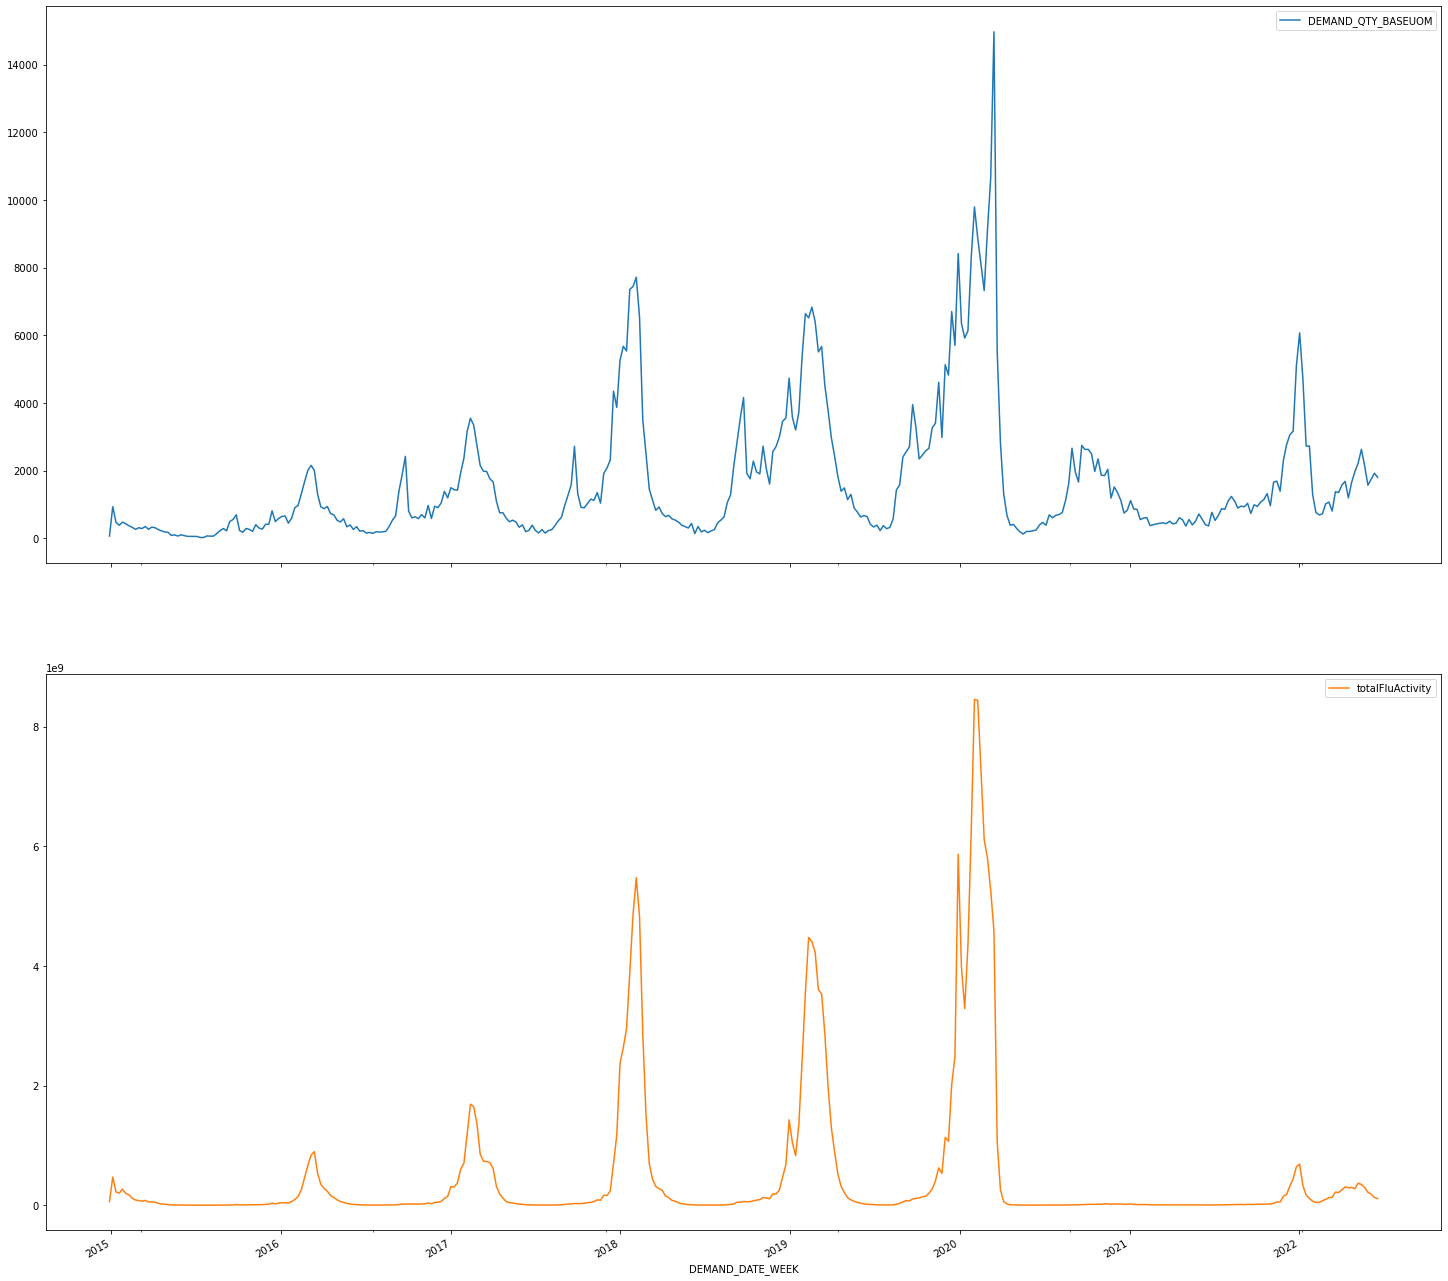

In [2]:
data = pd.read_excel('/Users/jonathan.cachat/Documents/CH Projects/2 - Influenza Lab Kits/data/DEMAND_FLUstats_byMaterial_reformat_summarize_group.xlsx')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data['DEMAND_DATE_WEEK'] = pd.to_datetime(data['DEMAND_DATE_WEEK'], yearfirst=True, infer_datetime_format=True)

# Set date column as index
data.set_index('DEMAND_DATE_WEEK', inplace=True)

# Inspect data
print(data.info())

# Plot data
data.plot(subplots=True);

In [3]:
data.head()

,DEMAND_QTY_BASEUOM,totalFluActivity
DEMAND_DATE_WEEK,,
2014-12-28 00:00:00-05:00,62,59853600
2015-01-04 00:00:00-05:00,931,470953230
2015-01-11 00:00:00-05:00,467,221422605
2015-01-18 00:00:00-05:00,380,202581064
2015-01-25 00:00:00-05:00,473,269323499


In [4]:
data.index.is_unique

True

# Change Frequency Interval of df.Series & Plot

In [ ]:
# Inspect data
print(data.info())

# Set the frequency to calendar daily
data = data.asfreq('M')

# Plot the data
data.plot(subplots=True);

# Set Frequency to monthly
data = data.asfreq('Y')

# Plot the data
data.plot(subplots=True);

# Break down Years and Plot on same chart

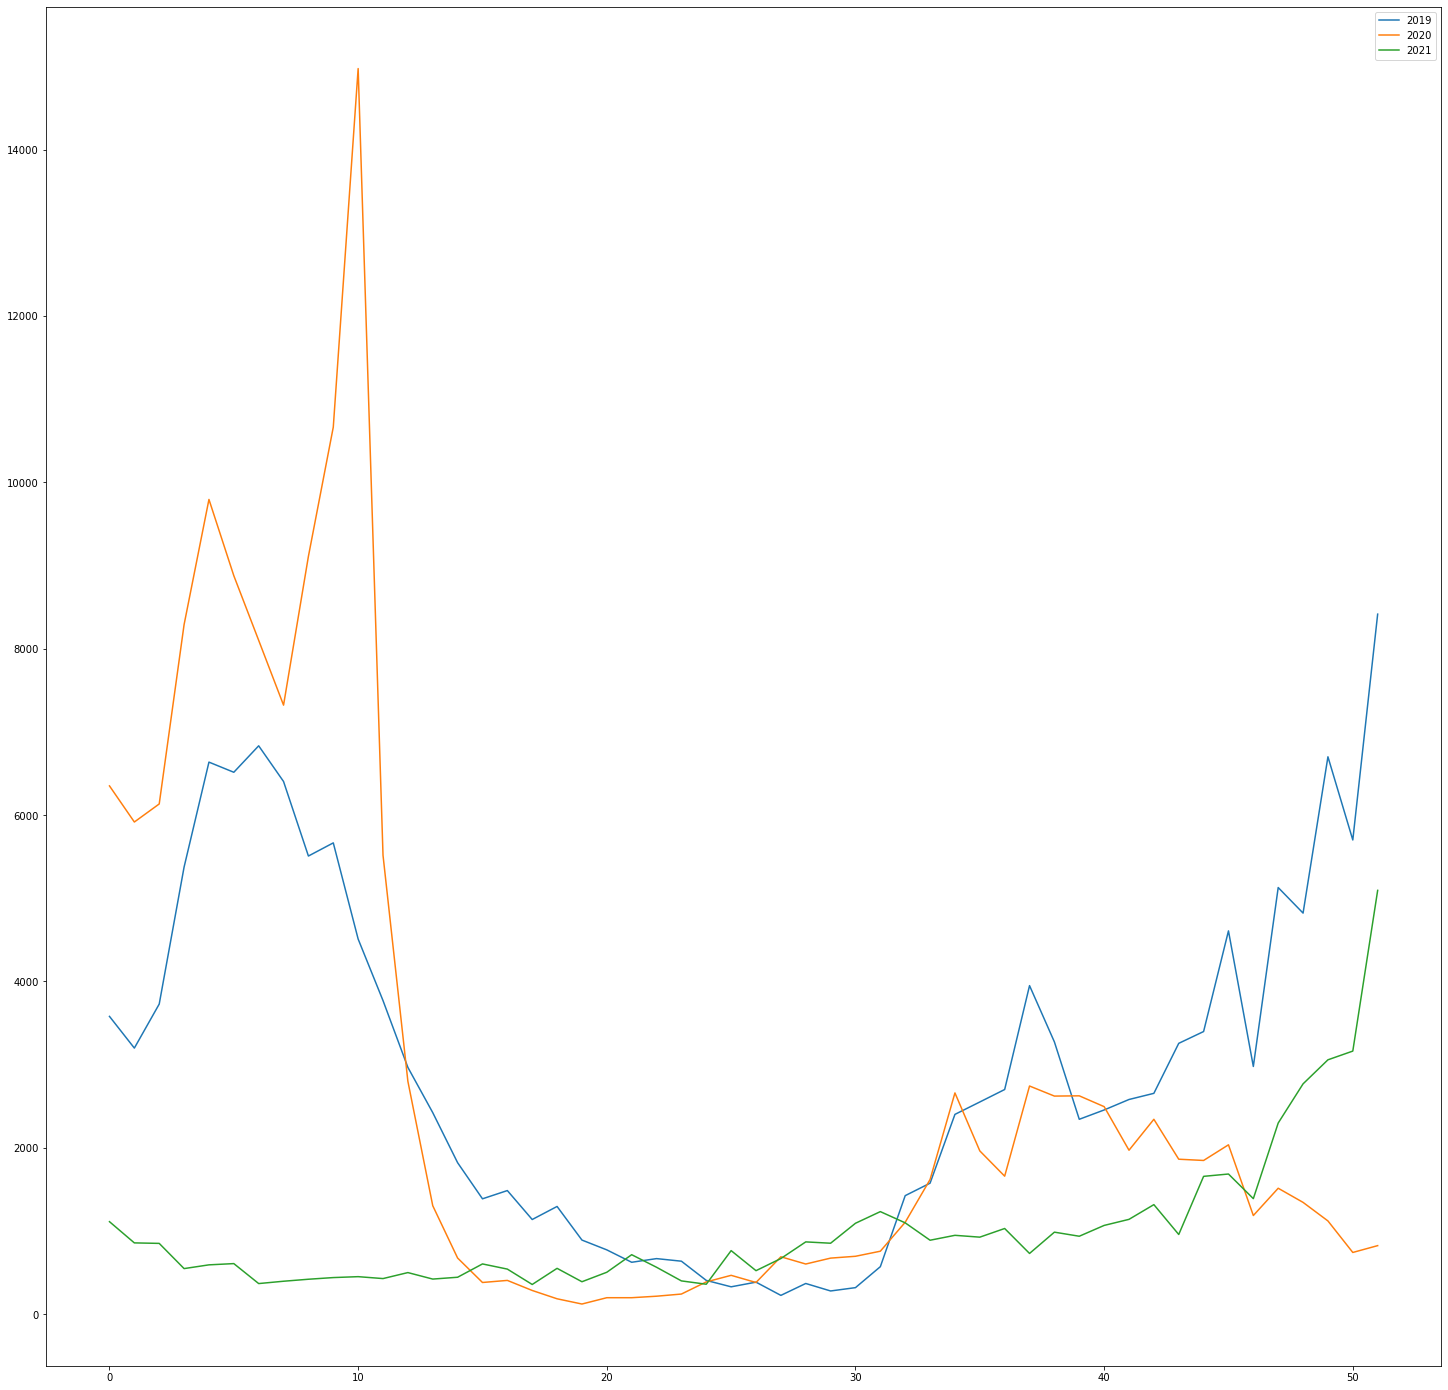

In [13]:
#data = pd.read_csv('/Users/jonathan.cachat/Library/CloudStorage/OneDrive-CardinalHealth/JupyterNB-JC/data/btc.csv')
data = pd.read_excel('/Users/jonathan.cachat/Documents/CH Projects/2 - Influenza Lab Kits/data/DEMAND_FLUstats_byMaterial_reformat_summarize_ALL Material.xlsx')


# Convert the date column to datetime64
data['DEMAND_DATE_WEEK'] = pd.to_datetime(data['DEMAND_DATE_WEEK'])

# Set date column as index
data.set_index('DEMAND_DATE_WEEK', inplace=True)

# Creat empty dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here
for year in ['2019', '2020', '2021']:
    price_per_year = data.loc[year, ['DEMAND_QTY_BASEUOM']].reset_index(drop=True)
    price_per_year.rename(columns={'DEMAND_QTY_BASEUOM':year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)
    
# Plot prices
prices.plot();